In [112]:
import json

import bz2

from tqdm import tqdm
from scipy import sparse

In [113]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

9451it [00:09, 946.66it/s] /anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
201030it [03:52, 864.86it/s]


#  Домашнее задание по NLP # 1 [100 баллов]
## Классификация по тональности 

В этом домашнем задании вам предстоит классифицировать по тональности отзывы на банки с сайта banki.ru.

Данные содержат непосредственно тексты отзывов, некоторую дополнительную информацию, а также оценку по шкале от 1 до 5. 

Тексты хранятся в json-ах в массиве responses.

Посмотрим на пример отзыва:

In [6]:
responses[99]

{'author': 'ronnichka',
 'bank_license': 'лицензия № 880',
 'bank_name': 'Югра',
 'city': 'г. Саратов',
 'datetime': '2015-06-03 20:56:57',
 'num_comments': 0,
 'rating_grade': 3,
 'rating_not_checked': False,
 'text': 'Здравствуйте! Хотела написать, что мне месяц не выдают карту ко вкладу, ссылаясь на "нам же их из Самары везут" (на секундочку 5 часов езды от нашего города). Но! Прочитала, что людям 3,5 месяцев не выдают карту, и поняла, что у меня все хорошо, пока что. И подарок мне дали, и кулер в отделении есть. Так что я, конечно, готова ждать. Правда хотелось бы не очень долго.',
 'title': 'Карта ко вкладу'}

## Часть 1. Анализ текстов [40/100]

1. Посчитайте количество отзывов в разных городах и на разные банки
2. Постройте гистограмы длин слов в символах и в словах
3. Найдите 10 самых частых:
    * слов
    * слов без стоп-слов
    * лемм 
* существительных
4. Постройте кривые Ципфа и Хипса
5. Ответьте на следующие вопросы:
    * какое слово встречается чаще, "сотрудник" или "клиент"?
    * сколько раз встречается слова "мошенничество" и "доверие"?
6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру $tf-idf$, для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

## Часть 2. Тематическое моделирование [20/100]

1. Постройте несколько тематических моделей коллекции документов с разным числом тем. Приведите примеры понятных (интерпретируемых) тем.
2. Найдите темы, в которых упомянуты конкретные банки (Сбербанк, ВТБ, другой банк). Можете ли вы их прокомментировать / объяснить?

Эта часть задания может быть сделана с использованием gensim. 

## Часть 3. Классификация текстов [40/100]

Сформулируем для простоты задачу бинарной классификации: будем классифицировать на два класса, то есть, различать резко отрицательные отзывы (с оценкой 1) и положительные отзывы (с оценкой 5). 

1.  Составьте обучающее и тестовое множество: выберите из всего набора данных N1 отзывов с оценкой 1 и N2 отзывов с оценкой 5 (значение N1 и N2 – на ваше усмотрение). Используйте ```sklearn.model_selection.train_test_split``` для разделения множества отобранных документов на обучающее и тестовое. 
2. Используйте любой известный вам алгоритм классификации текстов для решения задачи и получите baseline. Сравните разные варианты векторизации текста: использование только униграм, пар или троек слов или с использованием символьных $n$-грам. 
3. Сравните, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков:
* 1-ый вариант: $tf-idf$ преобразование (```sklearn.feature_extraction.text.TfidfTransformer```) и сингулярное разложение (оно же – латентый семантический анализ) (```sklearn.decomposition.TruncatedSVD```), 
* 2-ой вариант: тематические модели LDA (```sklearn.decomposition.LatentDirichletAllocation```). 

Используйте accuracy и F-measure для оценки качества классификации. 

Ниже написан примерный Pipeline для классификации текстов. 

Эта часть задания может быть сделана с использованием sklearn. 

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# !!! На каждом этапе Pipeline нужно указать свои параметры
# 1-ый вариант: tf-idf + LSI
# 2-ой вариант: LDA

# clf = Pipeline([
#     ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
#     ('clf', RandomForestClassifier()),
# ])



# clf = Pipeline([ 
#     ('vect', CountVectorizer()), 
#     ('tfidf', TfidfTransformer()), 
#     ('tm', TruncatedSVD()), 
#     ('clf', RandomForestClassifier())
# ])


# Решение

In [8]:
df = pd.DataFrame.from_dict(responses, orient='columns')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153499 entries, 0 to 153498
Data columns (total 10 columns):
author                153479 non-null object
bank_license          153498 non-null object
bank_name             153499 non-null object
city                  138325 non-null object
datetime              153499 non-null object
num_comments          153499 non-null int64
rating_grade          88658 non-null float64
rating_not_checked    153499 non-null bool
text                  153499 non-null object
title                 153499 non-null object
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 10.7+ MB


In [10]:
df.head(3)

,author,bank_license,bank_name,city,datetime,num_comments,rating_grade,rating_not_checked,text,title
0,uhnov1,лицензия № 2562,Бинбанк,г. Москва,2015-06-08 12:50:54,0,NaN,False,Добрый день! Я не являюсь клиентом банка и пор...,Жалоба
1,Foryou,лицензия № 1481,Сбербанк России,г. Новосибирск,2015-06-08 11:09:57,0,NaN,False,Доброго дня! Являюсь держателем зарплатной кар...,Не могу пользоваться услугой Сбербанк он-лайн
2,Vladimir84,лицензия № 2562,Бинбанк,г. Москва,2015-06-05 20:14:28,1,NaN,False,Здравствуйте! Дублирую свое заявление от 03.0...,Двойное списание за один товар.


In [11]:
df = df.iloc[:1000]

## Часть 1. Анализ текстов [40/100]

1. Посчитайте количество отзывов в разных городах и на разные банки
2. Постройте гистограмы длин слов в символах и в словах
3. Найдите 10 самых частых:
    * слов
    * слов без стоп-слов
    * лемм 
    * существительных
4. Постройте кривые Ципфа и Хипса
5. Ответьте на следующие вопросы:
    * какое слово встречается чаще, "сотрудник" или "клиент"?
    * сколько раз встречается слова "мошенничество" и "доверие"?
6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру $tf-idf$, для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

### 1. Посчитайте количество отзывов в разных городах и на разные банки

In [12]:
df.city.value_counts()[:5]

г. Москва             489
г. Санкт-Петербург     92
г. Ростов-на-Дону      15
г. Екатеринбург        15
г. Тюмень              12
Name: city, dtype: int64

In [13]:
df.bank_name.value_counts()[:5]

Сбербанк России            121
Тинькофф Банк              104
ВТБ 24                      60
Русский Стандарт            54
Восточный Экспресс Банк     53
Name: bank_name, dtype: int64

### 2. Постройте гистограмы длин слов в символах и в словах

## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [49]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""


df['text_words'] = df.text.str.lower()
df['text_words'] = df.text_words.apply(words_only)

df['text_words'].iloc[0]

'добрый день я не являюсь клиентом банка и поручителем по кредитному договору а также не являюсь каким либо другим лицом письменно оформившим отношения с банком по поводу урегулирования чьей либо задолженности начиная с марта года начали приходить бесконечные письма из ооо примо коллект на мой адрес город москва уваровский переулок дом квартира с угрозами о возбуждении уголовного дела в отношении гражданина филиппова эдуарда владимировича который уклоняется от уплаты взятых им кредитов договор от года и договор от года со всей ответственностью хочу вас заверить что вышеуказанный гражданин которого вы разыскиваете мне не знаком и никогда в моем адресе не был зарегистрирован каким образом вы не удостоверившись в подлинности его документов оформили на его имя кредитный договор мне по меньшей мере не понятно и почему по вашей милости я должна переживать и бояться за себе и свое имущество письма доставляют мне серьезные неудобства нарушают мои гражданские права а также нарушают закон о защи

In [50]:
# посчитаем длину каждого отзыва в символах
len_in_chars = df.text.apply(len)
len_in_chars.describe()

count     1000.000000
mean      1296.403000
std       1121.170213
min         41.000000
25%        587.750000
50%        974.500000
75%       1661.250000
max      12837.000000
Name: text, dtype: float64

In [51]:
# посчитаем длину каждого отзыва в словах
len_in_words = df.text_words.apply(lambda x: x.split(' '))
len_in_words = len_in_words.apply(len)
len_in_words.describe()

count    1000.000000
mean      190.956000
std       163.413304
min         4.000000
25%        84.000000
50%       142.500000
75%       244.000000
max      1674.000000
Name: text, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


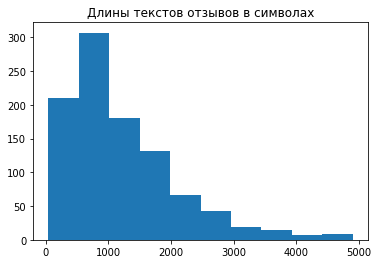

In [52]:
fig, ax = plt.subplots()

length = len_in_chars[len_in_chars < 5000].tolist()

ax.set_title('Длины текстов отзывов в символах')

n, bins, patches = ax.hist(length)

fig.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


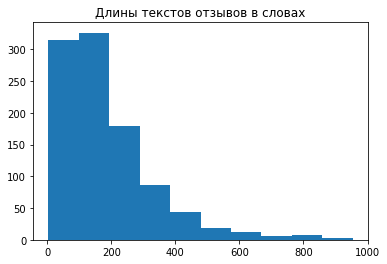

In [53]:
fig, ax = plt.subplots()

length = len_in_words[len_in_words < 1000].tolist()

ax.set_title('Длины текстов отзывов в словах')

n, bins, patches = ax.hist(length)

fig.show()

### 3. Найдите 10 самых частых:
    * слов
    * слов без стоп-слов
    * лемм 

In [54]:
from nltk import FreqDist

fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['text'].split()
    fd.update(tokens)

### 10 самых частых слов

In [55]:
for i in fd.most_common(10):
    print(i)

('в', 6112)
('и', 5173)
('не', 4521)
('на', 3459)
('что', 3095)
('с', 2427)
('я', 2292)
('по', 1990)
('мне', 1449)
('-', 1417)


### Удаление стоп-слов

In [72]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']
#print(stopwords.words('russian'))

In [73]:
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [74]:
#удаляем стоп-слова
df['text_words'] = df.text_words.apply(remove_stopwords) 

In [75]:
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['text_words'].split()
    fd.update(tokens)

### 10 самых частых слов без стоп-слов

In [76]:
for i in fd.most_common(10):
    print(i)

('банк', 3805)
('карта', 1801)
('кредит', 937)
('который', 865)
('деньги', 853)
('день', 830)
('вклад', 817)
('весь', 774)
('клиент', 770)
('сотрудник', 722)


### 10 самых частых лемм

In [79]:
from pymystem3 import Mystem
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [80]:
df['text_words'] = df['text_words'].apply(lemmatize)

In [81]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['text_words'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(i)

('банк', 4078)
('карта', 1801)
('кредит', 937)
('который', 865)
('деньги', 853)
('день', 830)
('вклад', 817)
('весь', 774)
('клиент', 770)
('сотрудник', 722)


### 10 самых частых существительных

In [121]:
fd_2 = FreqDist()
for word in fd:
    if(len(m.analyze(word)[0]['analysis']) and m.analyze(word)[0]['analysis'][0]['gr'][0] == 'S'):
        fd_2.update([word])
        
for i in fd_2.most_common(10):
    print(i[0])

день
клиент
банк
поручитель
договор
лицо
отношение
повод
урегулирование
задолженность


### 4. Постройте кривые Ципфа и Хипса

In [123]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['text'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))

### Закон Ципфа


В любом достаточно большом тексте ранг типа обратно пропорционален его частоте: $f = \frac{a}{r}$

$f$ – частота типа, $r$  – ранг типа, $a$  – параметр, для славянских языков – около 0.07

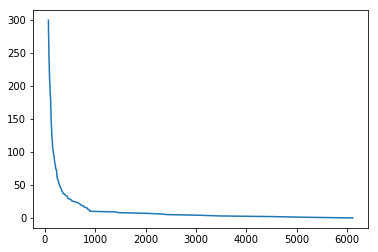

In [126]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### Закон Хипса

С увеличением длины текста (количества токенов), количество типов увеличивается в соответствии с законом: $|V| = K*N^b$


$N$  –  число токенов, $|V|$  – количество типов в словаре, $K, b$  –  параметры, обычно $K \in [10,100], b \in [0.4, 0.6]$

In [ ]:
1

TypeError: float() argument must be a string or a number, not 'dict_values'

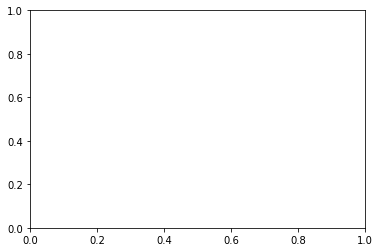

In [115]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()
